<a href="https://colab.research.google.com/github/SriVarshini15/Data-Science/blob/main/Task1(Decision).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Load data from CSV file

In [22]:
try:
    student_data = pd.read_csv("/content/student_data .csv")
except FileNotFoundError:
    print("Error: The file 'student_data.csv' was not found. Please make sure the file exists in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit()

# Handle missing values, if any

In [23]:
if 'student_data' in locals():
    print("Missing values before handling:")
    print(student_data.isnull().sum())
    student_data = student_data.dropna()
    print("Missing values after handling:")
    print(student_data.isnull().sum())
else:
    print("Error: student_data DataFrame was not properly loaded.")
    exit()

Missing values before handling:
High_school_GPA                         0
Number_of_extracurricular_activities    0
Parental_income                         0
Hours_studied_per_week                  0
Entrance_test_performance               0
Distance_from_college                   0
Internet_availability                   0
Final_year_result                       0
dtype: int64
Missing values after handling:
High_school_GPA                         0
Number_of_extracurricular_activities    0
Parental_income                         0
Hours_studied_per_week                  0
Entrance_test_performance               0
Distance_from_college                   0
Internet_availability                   0
Final_year_result                       0
dtype: int64


# Check if 'Internet_availability' column exists before processing

In [24]:
if 'Internet_availability' in student_data.columns:
    # Convert 'Internet_availability' to numeric
    student_data['Internet_availability'] = student_data['Internet_availability'].map({'Yes': 1, 'No': 0})
else:
    print("Error: 'Internet_availability' column not found in the dataset.")
    exit()

# Convert Final_year_result to numeric and Drop rows where conversion resulted in NaN

In [25]:
if student_data['Final_year_result'].dtype == 'object':
    print("Converting 'Final_year_result' to numeric...")
    # Attempt to convert to numeric, coerce errors to NaN
    student_data['Final_year_result'] = pd.to_numeric(student_data['Final_year_result'], errors='coerce')
    student_data = student_data.dropna(subset=['Final_year_result'])
else:
    print("'Final_year_result' is already numeric.")

'Final_year_result' is already numeric.


# Split data into features and target

In [26]:
X = student_data.drop('Final_year_result', axis=1)
y = student_data['Final_year_result']

# Split data into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train the Decision Tree model

In [29]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

# Make predictions

In [30]:
y_pred = dt_classifier.predict(X_test_scaled)


# Evaluate the model

In [31]:
print("Decision Tree Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Decision Tree Classifier Evaluation:
Accuracy: 0.0

Classification Report:
              precision    recall  f1-score   support

          81       0.00      0.00      0.00       0.0
          82       0.00      0.00      0.00       1.0
          87       0.00      0.00      0.00       0.0
          88       0.00      0.00      0.00       1.0
          89       0.00      0.00      0.00       1.0
          90       0.00      0.00      0.00       1.0
          92       0.00      0.00      0.00       1.0
          93       0.00      0.00      0.00       0.0
          97       0.00      0.00      0.00       0.0
          98       0.00      0.00      0.00       1.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



# Confusion Matrix

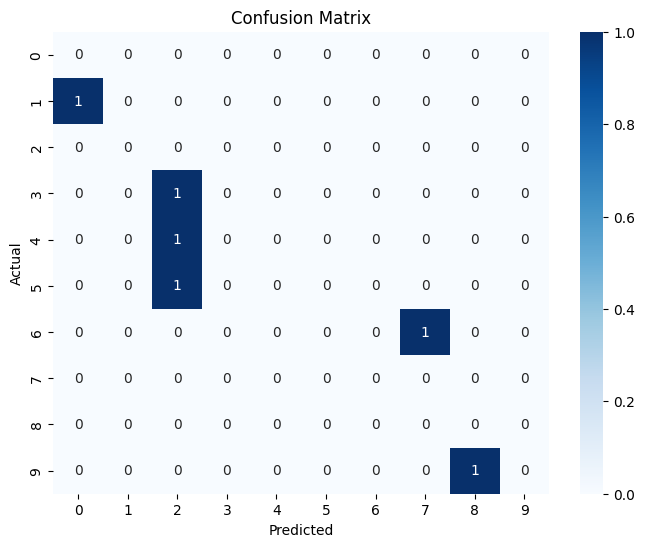

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Visualize the Decision Tree

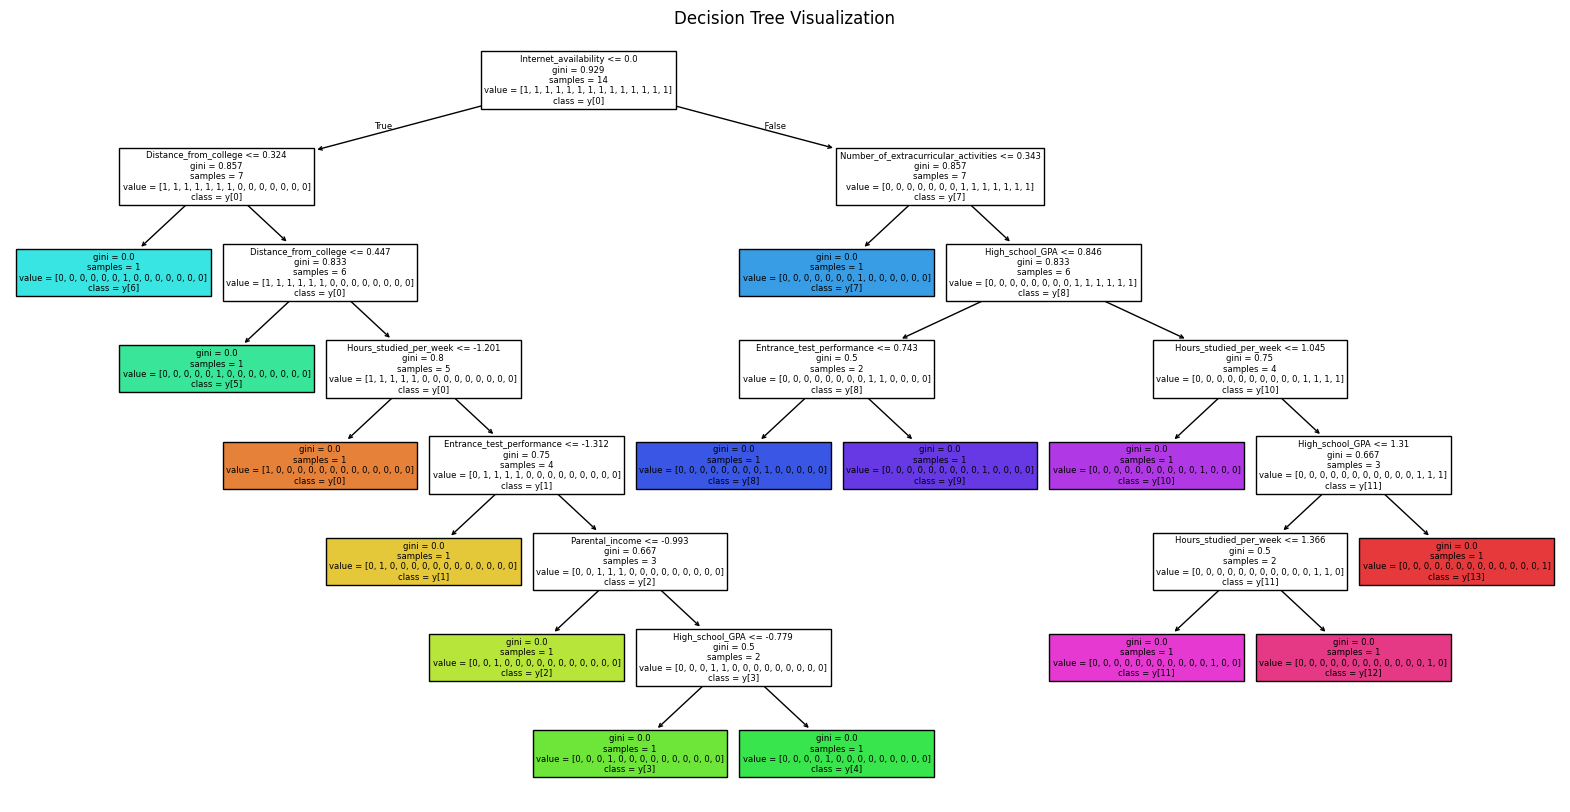

In [33]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=True)
plt.title('Decision Tree Visualization')
plt.show()

# Feature importance

In [34]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))


Feature Importance:
                                Feature  Importance
0                       High_school_GPA    0.230769
3                Hours_studied_per_week    0.230769
4             Entrance_test_performance    0.153846
5                 Distance_from_college    0.153846
1  Number_of_extracurricular_activities    0.076923
2                       Parental_income    0.076923
6                 Internet_availability    0.076923
